In [459]:
import os
import pandas as pd

directory = r'Datos\\Series-csv'

# !!!!!!!!!!!!!! Tenia un codigo muy feo y le pedi a chat ayuda para que se viera mas bonito !!!!!!!!!!!!!!

# Dictionary to store dataframes
dataframes = {}

# Iterate over all files in the directory
for i, filename in enumerate(os.listdir(directory), start=1):
    file_path = os.path.join(directory, filename)
    dataframes[f'df{i}'] = pd.read_csv(file_path)

# Extract specific dataframes
dfs = [dataframes[f'df{i}'] for i in range(1, 13)] # Hay 12 archivos

# Function to clean dataframe
def clean_dataframe(df):
    df = df.drop([0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16]).reset_index(drop=True) # Solo usan la fila 8, borro hasta que hay datos y reseteo el index
    df.columns = df.iloc[0] # La primera fila es el nombre de las columnas
    return df.drop([0]).reset_index(drop=True) # Borro la primera fila y reseteo el index

# Clean all dataframes
dfs = [clean_dataframe(df) for df in dfs]

# Assign cleaned dataframes back to individual variables
df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12 = dfs


C:\Users\herie\AppData\Local\Temp\ipykernel_26024\1856070868.py:14: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,81,82,83,84,93,94,95,96,97,98,99,100,101,102,103,104,109,110,111,112,121,122,123,124,157,158,159,160,161,162,163,164,165,166,167,168) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes[f'df{i}'] = pd.read_csv(file_path)


In [460]:
# Assign cleaned dataframes back to individual variables
df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12 = dfs

## **Vamos a hacer que todos tengan el mismo Índice, que va a ser el primer día del mes desde 2010**

### DF1

In [461]:
df1.head()

,Título,"TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen","TIIE a 28 días, Tasa de interés en por ciento anual","Tasas de interés interbancarias Por ciento anual, TIIE a 91 días",TIIE a 182 días,"Tasas de interés interbancarias Por ciento anual, TIIP a 28 días"
0,2006-01-02 00:00:00,8.27,8.57,N/E,N/E,N/E
1,2006-01-03 00:00:00,8.28,8.565,N/E,N/E,N/E
2,2006-01-04 00:00:00,8.28,8.55,N/E,N/E,N/E
3,2006-01-05 00:00:00,8.28,8.565,8.28,N/E,N/E
4,2006-01-06 00:00:00,8.28,8.575,N/E,N/E,N/E


In [462]:
# ya vivi esto

df1 = df1.set_index("Título")   # hacemos que la fecha sea el index
df1.index.names = ["Fecha"]     # le cambiamos el nombre de Título a Fecha
df1.index = pd.to_datetime(df1.index) # Convertimos el index a datetime, es mas facil trabajar con fechas
df1.index = df1.index.to_period("M") # Convertimos el index a Period con frecuencia mensual

df1.head()

,"TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen","TIIE a 28 días, Tasa de interés en por ciento anual","Tasas de interés interbancarias Por ciento anual, TIIE a 91 días",TIIE a 182 días,"Tasas de interés interbancarias Por ciento anual, TIIP a 28 días"
Fecha,,,,,
2006-01,8.27,8.57,N/E,N/E,N/E
2006-01,8.28,8.565,N/E,N/E,N/E
2006-01,8.28,8.55,N/E,N/E,N/E
2006-01,8.28,8.565,8.28,N/E,N/E
2006-01,8.28,8.575,N/E,N/E,N/E


In [463]:
# tiie de 28d es la columna 1

tiie = df1[df1.columns[1]]

# la hacemos serie de dataframe
tiie = pd.DataFrame(tiie)
# Remove duplicate entries for each month
tiie = tiie.groupby(tiie.index).first()
# solo queremos un periodo por mes
tiie.head(30)

,"TIIE a 28 días, Tasa de interés en por ciento anual"
Fecha,
2006-01,8.57
2006-02,8.11
2006-03,7.78
2006-04,7.58
2006-05,7.31
2006-06,7.34
2006-07,7.325
2006-08,7.325
2006-09,7.2887


<Axes: xlabel='Fecha'>

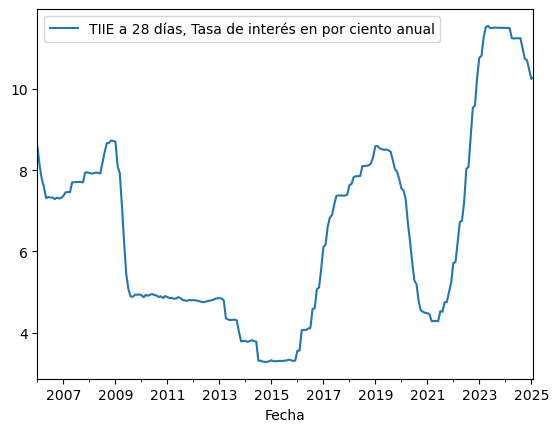

In [464]:
# Convert relevant columns to numeric data types
tiie = tiie.apply(pd.to_numeric, errors='coerce')

# graficamos
tiie.plot()

que facil era, pero ya aprendi. la vdd no sabia que todas eran casi iguales pero podia ver los datos al principio en lugar de al final

### DF2

In [465]:
df2.head()

,Título,"Sistemas de pago de bajo valor, Tarjetas de crédito, Tarjetas vigentes al cierre del trimestre (todas las marcas)","Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), A","Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), B","Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), C","Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), D","Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), E","Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), F","Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), G","Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), H",...,"Sistemas de pago de bajo valor, Tarjetas de débito (otras marcas), O","Sistemas de pago de bajo valor, Tarjetas de débito (otras marcas), P","Sistemas de pago de bajo valor, Tarjetas de débito (otras marcas), Q","Sistemas de pago de bajo valor, Tarjetas de débito (otras marcas), R","Sistemas de pago de bajo valor, Tarjetas de débito (otras marcas), Z","Sistemas de pago de bajo valor, Tarjetas de débito (otras marcas), W","Sistemas de pago de bajo valor, Tarjetas de débito (otras marcas), AD","Sistemas de pago de bajo valor, Tarjetas de débito (otras marcas), AF","Sistemas de pago de bajo valor, Tarjetas de débito, Tarjetas utilizadas durante el trimestre","Sistemas de pago de bajo valor, Tarjetas de débito, Cuentas con tarjetas"
0,2006-01-01 00:00:00,19194516,2888159,16828,5184010,4342957,3344859,1445254,7463,32013,...,0,2690,0,0,0,0,0,0,22479571,20354949
1,2006-04-01 00:00:00,21042559,3278850,16779,5267092,4595294,3863157,1889587,7821,34769,...,0,2922,0,0,0,0,0,0,23143881,21052656
2,2006-07-01 00:00:00,23045079,3572291,16668,5652088,4940651,4311374,2111096,8243,38985,...,0,3132,0,0,0,0,0,0,23649992,22205999
3,2006-10-01 00:00:00,24552482,3902273,16420,5701202,5103822,4672691,2432677,14619,49114,...,0,3359,0,0,0,0,0,0,24543746,22714814
4,2007-01-01 00:00:00,25732459,4144985,17879,5949267,5319045,4793506,2800621,15094,70788,...,0,3593,0,0,0,0,0,0,24888231,23771335


In [466]:
# hacemos que la fecha sea el index
df2 = df2.set_index("Título")
df2.index.names = ["Fecha"]
df2.index = pd.to_datetime(df2.index)
df2.index = df2.index.to_period("M")
df2.head()

,"Sistemas de pago de bajo valor, Tarjetas de crédito, Tarjetas vigentes al cierre del trimestre (todas las marcas)","Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), A","Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), B","Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), C","Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), D","Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), E","Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), F","Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), G","Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), H","Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), I",...,"Sistemas de pago de bajo valor, Tarjetas de débito (otras marcas), O","Sistemas de pago de bajo valor, Tarjetas de débito (otras marcas), P","Sistemas de pago de bajo valor, Tarjetas de débito (otras marcas), Q","Sistemas de pago de bajo valor, Tarjetas de débito (otras marcas), R","Sistemas de pago de bajo valor, Tarjetas de débito (otras marcas), Z","Sistemas de pago de bajo valor, Tarjetas de débito (otras marcas), W","Sistemas de pago de bajo valor, Tarjetas de débito (otras marcas), AD","Sistemas de pago de bajo valor, Tarjetas de débito (otras marcas), AF","Sistemas de pago de bajo valor, Tarjetas de débito, Tarjetas utilizadas durante el trimestre","Sistemas de pago de bajo valor, Tarjetas de débito, Cuentas con tarjetas"
Fecha,,,,,,,,,,,,,,,,,,,,,
2006-01,19194516,2888159,16828,5184010,4342957,3344859,1445254,7463,32013,92971,...,0,2690,0,0,0,0,0,0,22479571,20354949
2006-04,21042559,3278850,16779,5267092,4595294,3863157,1889587,7821,34769,116089,...,0,2922,0,0,0,0,0,0,23143881,21052656
2006-07,23045079,3572291,16668,5652088,4940651,4311374,2111096,8243,38985,151223,...,0,3132,0,0,0,0,0,0,23649992,22205999
2006-10,24552482,3902273,16420,5701202,5103822,4672691,2432677,14619,49114,205098,...,0,3359,0,0,0,0,0,0,24543746,22714814
2007-01,25732459,4144985,17879,5949267,5319045,4793506,2800621,15094,70788,273107,...,0,3593,0,0,0,0,0,0,24888231,23771335


**lo vamos a tener que hacer por trimestre? o duplicamos las que estan?**

### DF3

In [467]:
df3.head()  

,Título,"TIIE de fondeo a 1 día, Tasa de interés promedio mensual, en por ciento anual","TIIE a 28 días, Tasa de interés promedio mensual, en por ciento anual","TIIE a 91 días, Tasa de interés promedio mensual, en por ciento anual","TIIE a 182 días, Tasa de interés promedio mensual, en por ciento anual","TIIP a 28 días (Serie histórica), Tasa de interés promedio mensual, en por ciento anual","Tasas Mexibor a 1 mes, Tasa promedio mensual Por ciento anual","Tasa Mexibor a 3 meses, Tasa de interés promedio mensual, en por ciento anual","Tasa Mexibor a 6 meses, Tasa de interés promedio mensual, en por ciento anual","Tasa Mexibor a 9 meses, Tasa de interés promedio mensual, en por ciento anual","Tasa Mexibor a 1 año, Tasa de interés promedio mensual, en por ciento anual","Fondeo promedio ponderado bancario, Tasa de interés promedio mensual, en por ciento anual","Fondeo promedio ponderado gubernamental, Tasa de interés promedio mensual, en por ciento anual","Pagaré Bancario Bursátil a 28 días, Tasa de rendimiento en promedio ponderado, en por ciento anual"
0,1988-01-01 00:00:00,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,0
1,1988-02-01 00:00:00,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,0
2,1988-03-01 00:00:00,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,0
3,1988-04-01 00:00:00,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,62.33
4,1988-05-01 00:00:00,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,53.73


In [468]:
# solo queremos las de 28 dias (MENOS MEXIBOR Y TIIP porque tienen muchos N/E)
df3 = df3.iloc[:, [0, 2, 5, 12, 13]]
df3.head()

,Título,"TIIE a 28 días, Tasa de interés promedio mensual, en por ciento anual","TIIP a 28 días (Serie histórica), Tasa de interés promedio mensual, en por ciento anual","Fondeo promedio ponderado gubernamental, Tasa de interés promedio mensual, en por ciento anual","Pagaré Bancario Bursátil a 28 días, Tasa de rendimiento en promedio ponderado, en por ciento anual"
0,1988-01-01 00:00:00,N/E,N/E,N/E,0
1,1988-02-01 00:00:00,N/E,N/E,N/E,0
2,1988-03-01 00:00:00,N/E,N/E,N/E,0
3,1988-04-01 00:00:00,N/E,N/E,N/E,62.33
4,1988-05-01 00:00:00,N/E,N/E,N/E,53.73


In [469]:
# hacemos que la fecha sea el index
df3 = df3.set_index("Título")
df3.index.names = ["Fecha"]
df3.index = pd.to_datetime(df3.index)
df3.head()

,"TIIE a 28 días, Tasa de interés promedio mensual, en por ciento anual","TIIP a 28 días (Serie histórica), Tasa de interés promedio mensual, en por ciento anual","Fondeo promedio ponderado gubernamental, Tasa de interés promedio mensual, en por ciento anual","Pagaré Bancario Bursátil a 28 días, Tasa de rendimiento en promedio ponderado, en por ciento anual"
Fecha,,,,
1988-01-01,N/E,N/E,N/E,0
1988-02-01,N/E,N/E,N/E,0
1988-03-01,N/E,N/E,N/E,0
1988-04-01,N/E,N/E,N/E,62.33
1988-05-01,N/E,N/E,N/E,53.73


In [470]:
df3 = df3.replace("N/E", pd.NA).dropna()
df3.head()

,"TIIE a 28 días, Tasa de interés promedio mensual, en por ciento anual","TIIP a 28 días (Serie histórica), Tasa de interés promedio mensual, en por ciento anual","Fondeo promedio ponderado gubernamental, Tasa de interés promedio mensual, en por ciento anual","Pagaré Bancario Bursátil a 28 días, Tasa de rendimiento en promedio ponderado, en por ciento anual"
Fecha,,,,
1995-03-01,89.48,86.03,64.83,82.17
1995-04-01,85.22,85.33,75.09,79.44
1995-05-01,60.45,60.53,56.62,60.49
1995-06-01,49.5,49.49,47.18,49.67
1995-07-01,43,42.92,42.41,42.86


In [471]:
# pasamos de fecha a periodo mensual
df3.index = df3.index.to_period("M")
df3.head(30)

,"TIIE a 28 días, Tasa de interés promedio mensual, en por ciento anual","TIIP a 28 días (Serie histórica), Tasa de interés promedio mensual, en por ciento anual","Fondeo promedio ponderado gubernamental, Tasa de interés promedio mensual, en por ciento anual","Pagaré Bancario Bursátil a 28 días, Tasa de rendimiento en promedio ponderado, en por ciento anual"
Fecha,,,,
1995-03,89.48,86.03,64.83,82.17
1995-04,85.22,85.33,75.09,79.44
1995-05,60.45,60.53,56.62,60.49
1995-06,49.5,49.49,47.18,49.67
1995-07,43,42.92,42.41,42.86
1995-08,37.6,37.57,35.67,37.61
1995-09,35.48,35.48,33.3,35.61
1995-10,42.61,42.57,40.57,42.57
1995-11,57.43,57.21,55.09,59.48


<Axes: xlabel='Fecha'>

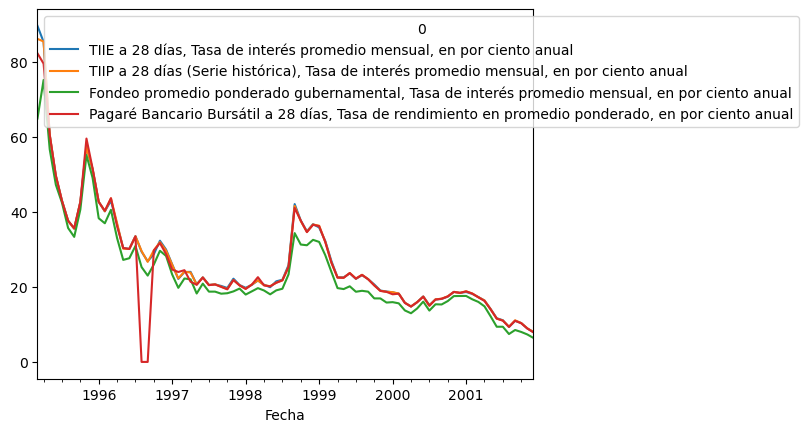

In [472]:
# Convert relevant columns to numeric data types
df3 = df3.apply(pd.to_numeric, errors='coerce')

# graficamos
df3.plot()

ahora se que son todas casi iguales :)

### DF4

In [473]:
df4.head()

,Título,"Tasa de efectiva promedio ponderada por saldo de todos los clientes con y sin promociones, Tarjetas de crédito","Tasa de efectiva promedio ponderada por saldo de clientes no totaleros con y sin promociones, Tarjetas de crédito","Tasa de efectiva promedio ponderada por saldo de clientes no totaleros sin promociones, Tarjetas de crédito"
0,2011-03-01 00:00:00,25.0942,30.3445,37.6358
1,2011-05-01 00:00:00,24.9821,30.3204,37.7136
2,2011-07-01 00:00:00,24.8008,30.2965,37.7225
3,2011-09-01 00:00:00,25.2722,30.5503,37.8129
4,2011-11-01 00:00:00,24.522,30.3803,37.8729


In [474]:
# uso mucho esto entonces lo hago una funcion

def clean_df(df3):
    # hacemos que la fecha sea el index
    df3 = df3.set_index("Título")
    df3.index.names = ["Fecha"]
    df3.index = pd.to_datetime(df3.index)
    df3.index = df3.index.to_period("M")
    df3 = df3.apply(pd.to_numeric, errors='coerce')
    return df3

df4 = clean_df(df4)
df4.head()

,"Tasa de efectiva promedio ponderada por saldo de todos los clientes con y sin promociones, Tarjetas de crédito","Tasa de efectiva promedio ponderada por saldo de clientes no totaleros con y sin promociones, Tarjetas de crédito","Tasa de efectiva promedio ponderada por saldo de clientes no totaleros sin promociones, Tarjetas de crédito"
Fecha,,,
2011-03,25.0942,30.3445,37.6358
2011-05,24.9821,30.3204,37.7136
2011-07,24.8008,30.2965,37.7225
2011-09,25.2722,30.5503,37.8129
2011-11,24.5220,30.3803,37.8729


<Axes: xlabel='Fecha'>

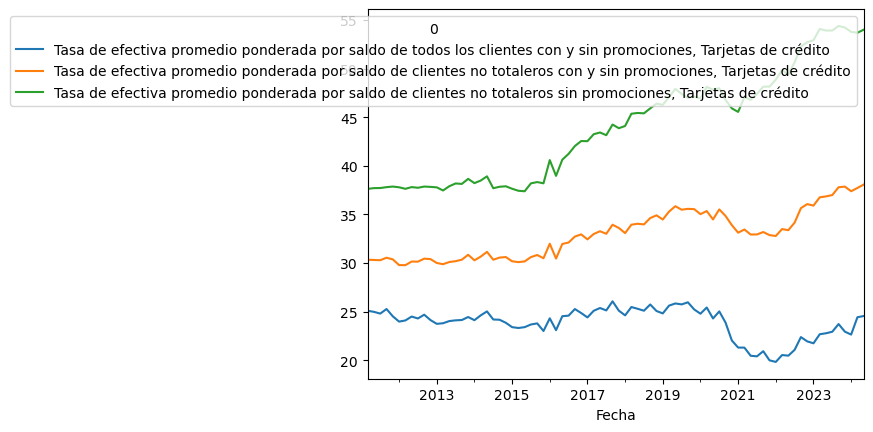

In [475]:
df4.plot()

### DF5

In [476]:
df5.head()

,Título,"Costo de captación a plazo de pasivos en moneda nacional (CCP), Tasa en por ciento anual","Costo de captación a plazo de pasivos en moneda nacional observado (CCPO), Tasa en por ciento anual","Costo de captación a plazo de pasivos en Udis (CCP-Udis), Tasa en por ciento anual","Costo de captación a plazo de pasivos en dólares (CCP-Dólares), Tasa en por ciento anual","Costo porcentual promedio (CPP), Tasa en por ciento anual","Costo de captaciÃ³n a plazo de pasivos estables (CPPE), Tasa en por ciento anual","Tasa de interés de los pasivos a plazo, Moneda nacional, Banca de Desarrollo"
0,1975-08-01 00:00:00,N/E,N/E,N/E,N/E,11.91,N/E,N/E
1,1975-09-01 00:00:00,N/E,N/E,N/E,N/E,11.91,N/E,N/E
2,1975-10-01 00:00:00,N/E,N/E,N/E,N/E,11.91,N/E,N/E
3,1975-11-01 00:00:00,N/E,N/E,N/E,N/E,11.92,N/E,N/E
4,1975-12-01 00:00:00,N/E,N/E,N/E,N/E,11.97,N/E,N/E


In [477]:
df5 = clean_df(df5)

df5.head(30)

,"Costo de captación a plazo de pasivos en moneda nacional (CCP), Tasa en por ciento anual","Costo de captación a plazo de pasivos en moneda nacional observado (CCPO), Tasa en por ciento anual","Costo de captación a plazo de pasivos en Udis (CCP-Udis), Tasa en por ciento anual","Costo de captación a plazo de pasivos en dólares (CCP-Dólares), Tasa en por ciento anual","Costo porcentual promedio (CPP), Tasa en por ciento anual","Costo de captaciÃ³n a plazo de pasivos estables (CPPE), Tasa en por ciento anual","Tasa de interés de los pasivos a plazo, Moneda nacional, Banca de Desarrollo"
Fecha,,,,,,,
1975-08,NaN,NaN,NaN,NaN,11.91,NaN,NaN
1975-09,NaN,NaN,NaN,NaN,11.91,NaN,NaN
1975-10,NaN,NaN,NaN,NaN,11.91,NaN,NaN
1975-11,NaN,NaN,NaN,NaN,11.92,NaN,NaN
1975-12,NaN,NaN,NaN,NaN,11.97,NaN,NaN
1976-01,NaN,NaN,NaN,NaN,11.86,NaN,NaN
1976-02,NaN,NaN,NaN,NaN,11.83,NaN,NaN
1976-03,NaN,NaN,NaN,NaN,11.78,NaN,NaN
1976-04,NaN,NaN,NaN,NaN,11.79,NaN,NaN


<Axes: xlabel='Fecha'>

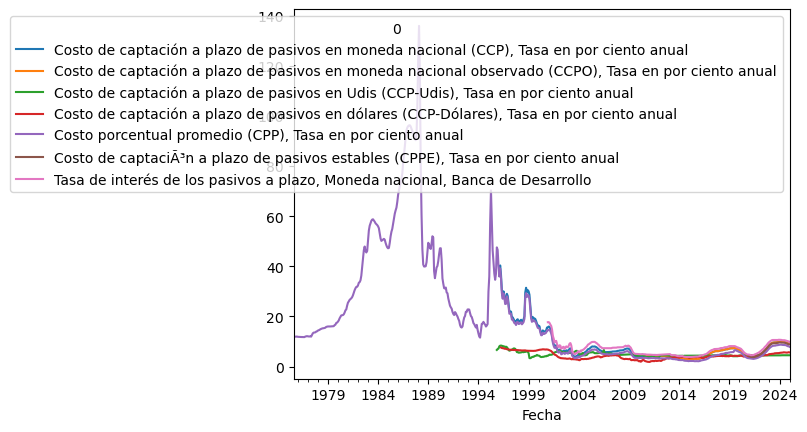

In [478]:
df5.plot()

### DF6

In [479]:
df6.head()

,Título,"Valores privados de corto plazo semanal, Total corto plazo, tasa promedio ponderada, Porcentajes","Valores privados de corto plazo semanal, Papel comercial, tasa promedio ponderada, Porcentajes","Valores privados de corto plazo semanal, Certificados bursátiles a corto plazo, tasa promedio ponderada, Porcentajes"
0,2002-01-04 00:00:00,9.4,9.4,N/E
1,2002-01-11 00:00:00,7.54,7.54,N/E
2,2002-01-18 00:00:00,7.76,7.76,N/E
3,2002-01-25 00:00:00,7.49,7.49,N/E
4,2002-02-01 00:00:00,8.88,8.88,N/E


In [480]:
df6 = clean_df(df6)


df6.head()

,"Valores privados de corto plazo semanal, Total corto plazo, tasa promedio ponderada, Porcentajes","Valores privados de corto plazo semanal, Papel comercial, tasa promedio ponderada, Porcentajes","Valores privados de corto plazo semanal, Certificados bursátiles a corto plazo, tasa promedio ponderada, Porcentajes"
Fecha,,,
2002-01,9.40,9.40,NaN
2002-01,7.54,7.54,NaN
2002-01,7.76,7.76,NaN
2002-01,7.49,7.49,NaN
2002-02,8.88,8.88,NaN


In [481]:
df6 = df6.groupby(df6.index).first()

df6.head(30)

,"Valores privados de corto plazo semanal, Total corto plazo, tasa promedio ponderada, Porcentajes","Valores privados de corto plazo semanal, Papel comercial, tasa promedio ponderada, Porcentajes","Valores privados de corto plazo semanal, Certificados bursátiles a corto plazo, tasa promedio ponderada, Porcentajes"
Fecha,,,
2002-01,9.40,9.40,NaN
2002-02,8.88,8.88,NaN
2002-03,8.35,8.35,NaN
2002-04,7.27,7.27,NaN
2002-05,7.93,7.93,NaN
2002-06,8.79,8.79,NaN
2002-07,9.22,9.22,NaN
2002-08,7.57,7.57,NaN
2002-09,7.77,7.76,8.23


<Axes: xlabel='Fecha'>

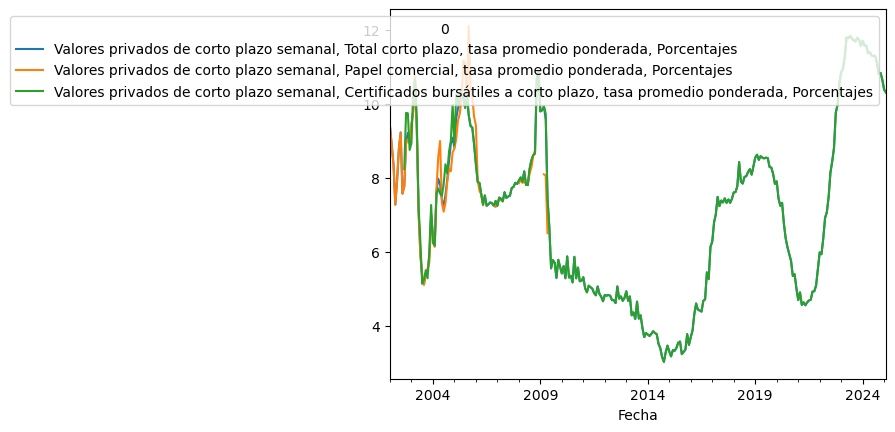

In [482]:
df6.plot()

### DF7

In [483]:
df7.head()

,Título,"Tasa de fondeo gubernamental, Mediana ponderada por volumen, Tasa de interés en por ciento anual",Tasa de fondeo ponderada con BPAS y BREMS.,"Tasa de fondeo gubernamental, Percentil 25, Tasa de interés en por ciento anual","Tasa de fondeo gubernamental, Percentil 75, Tasa de interés en por ciento anual"
0,2019-01-02 00:00:00,8.31,8.31,N/E,N/E
1,2019-01-03 00:00:00,8.28,8.27,N/E,N/E
2,2019-01-04 00:00:00,8.24,8.24,N/E,N/E
3,2019-01-07 00:00:00,8.26,8.26,N/E,N/E
4,2019-01-08 00:00:00,8.26,8.25,N/E,N/E


In [484]:
df7 = clean_df(df7)

df7.head()

,"Tasa de fondeo gubernamental, Mediana ponderada por volumen, Tasa de interés en por ciento anual",Tasa de fondeo ponderada con BPAS y BREMS.,"Tasa de fondeo gubernamental, Percentil 25, Tasa de interés en por ciento anual","Tasa de fondeo gubernamental, Percentil 75, Tasa de interés en por ciento anual"
Fecha,,,,
2019-01,8.31,8.31,NaN,NaN
2019-01,8.28,8.27,NaN,NaN
2019-01,8.24,8.24,NaN,NaN
2019-01,8.26,8.26,NaN,NaN
2019-01,8.26,8.25,NaN,NaN


In [485]:
df7 = df7.groupby(df7.index).first()

df7.head()

,"Tasa de fondeo gubernamental, Mediana ponderada por volumen, Tasa de interés en por ciento anual",Tasa de fondeo ponderada con BPAS y BREMS.,"Tasa de fondeo gubernamental, Percentil 25, Tasa de interés en por ciento anual","Tasa de fondeo gubernamental, Percentil 75, Tasa de interés en por ciento anual"
Fecha,,,,
2019-01,8.31,8.31,NaN,NaN
2019-02,8.28,8.28,NaN,NaN
2019-03,8.28,8.27,NaN,NaN
2019-04,8.29,8.29,NaN,NaN
2019-05,8.29,8.29,NaN,NaN


<Axes: xlabel='Fecha'>

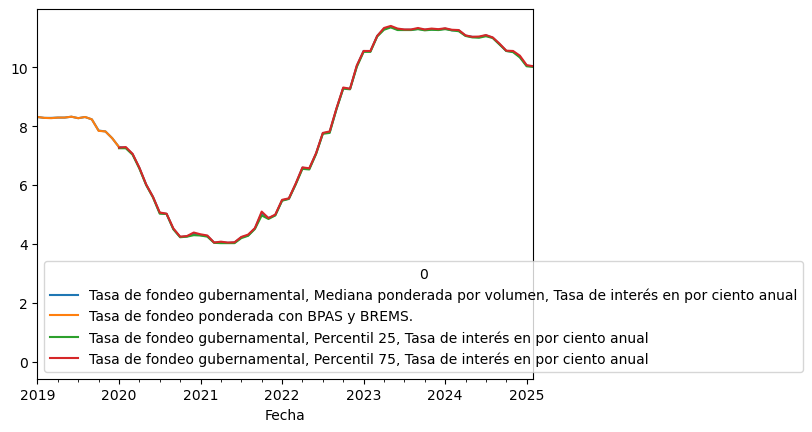

In [486]:
df7.plot()

### DF8

In [487]:
df8.head()

,Título,"Vector de precios de títulos gubernamentales, Cetes 28 días - Plazo","Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Limpio","Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Sucio","Vector de precios de títulos gubernamentales, Cetes 28 días - Tasa Rendimiento","Vector de precios de títulos gubernamentales, Cetes 91 días - Plazo","Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Limpio","Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Sucio","Vector de precios de títulos gubernamentales, Cetes 91 días - Tasa Rendimiento","Vector de precios de títulos gubernamentales, Cetes 182 días - Plazo",...,"Vector de precios de títulos gubernamentales, Brems 1 Año - Precio Sucio","Vector de precios de títulos gubernamentales, Brems 1 Año - Cupón Vigente","Vector de precios de títulos gubernamentales, Brems 3 Años - Plazo","Vector de precios de títulos gubernamentales, Brems 3 Años - Precio Limpio","Vector de precios de títulos gubernamentales, Brems 3 Años - Precio Sucio","Vector de precios de títulos gubernamentales, Brems 3 Años - Cupón Vigente","Vector de precios de títulos gubernamentales, Brems 5 Años - Plazo","Vector de precios de títulos gubernamentales, Brems 5 Años - Precio Limpio","Vector de precios de títulos gubernamentales, Brems 5 Años - Precio Sucio","Vector de precios de títulos gubernamentales, Brems 5 Años - Cupón Vigente"
0,2003-05-16 00:00:00,27,9.95665,9.95665,5.805165,90,9.85075,9.85075,6.060452,181,...,99.738241,5.01,1077,98.73447,98.972248,5.27,N/E,N/E,N/E,N/E
1,2003-05-19 00:00:00,24,9.961733,9.961733,5.7621,87,9.848233,9.848233,6.376792,178,...,99.783577,5.01,1074,98.735,99.019472,5.27,N/E,N/E,N/E,N/E
2,2003-05-20 00:00:00,23,9.965181,9.965181,5.468973,86,9.863117,9.863117,5.809508,177,...,99.83144,5.01,1073,98.77321,99.07321,5.27,N/E,N/E,N/E,N/E
3,2003-05-21 00:00:00,22,9.968039,9.968039,5.246751,85,9.866597,9.866597,5.726401,176,...,99.83534,5.01,1072,98.75039,99.065973,5.27,N/E,N/E,N/E,N/E
4,2003-05-22 00:00:00,28,9.960956,9.960956,5.03962,91,9.859708,9.859708,5.628983,175,...,99.87124,5.01,1071,98.77293,99.10293,5.27,N/E,N/E,N/E,N/E


In [488]:
df8 = clean_df(df8)

df8.head()

,"Vector de precios de títulos gubernamentales, Cetes 28 días - Plazo","Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Limpio","Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Sucio","Vector de precios de títulos gubernamentales, Cetes 28 días - Tasa Rendimiento","Vector de precios de títulos gubernamentales, Cetes 91 días - Plazo","Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Limpio","Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Sucio","Vector de precios de títulos gubernamentales, Cetes 91 días - Tasa Rendimiento","Vector de precios de títulos gubernamentales, Cetes 182 días - Plazo","Vector de precios de títulos gubernamentales, Cetes 182 días - Precio Limpio",...,"Vector de precios de títulos gubernamentales, Brems 1 Año - Precio Sucio","Vector de precios de títulos gubernamentales, Brems 1 Año - Cupón Vigente","Vector de precios de títulos gubernamentales, Brems 3 Años - Plazo","Vector de precios de títulos gubernamentales, Brems 3 Años - Precio Limpio","Vector de precios de títulos gubernamentales, Brems 3 Años - Precio Sucio","Vector de precios de títulos gubernamentales, Brems 3 Años - Cupón Vigente","Vector de precios de títulos gubernamentales, Brems 5 Años - Plazo","Vector de precios de títulos gubernamentales, Brems 5 Años - Precio Limpio","Vector de precios de títulos gubernamentales, Brems 5 Años - Precio Sucio","Vector de precios de títulos gubernamentales, Brems 5 Años - Cupón Vigente"
Fecha,,,,,,,,,,,,,,,,,,,,,
2003-05,27.0,9.956650,9.956650,5.805165,90.0,9.850750,9.850750,6.060452,181.0,9.672189,...,99.738241,5.01,1077.0,98.73447,98.972248,5.27,NaN,NaN,NaN,NaN
2003-05,24.0,9.961733,9.961733,5.762100,87.0,9.848233,9.848233,6.376792,178.0,9.676633,...,99.783577,5.01,1074.0,98.73500,99.019472,5.27,NaN,NaN,NaN,NaN
2003-05,23.0,9.965181,9.965181,5.468973,86.0,9.863117,9.863117,5.809508,177.0,9.690250,...,99.831440,5.01,1073.0,98.77321,99.073210,5.27,NaN,NaN,NaN,NaN
2003-05,22.0,9.968039,9.968039,5.246751,85.0,9.866597,9.866597,5.726401,176.0,9.692489,...,99.835340,5.01,1072.0,98.75039,99.065973,5.27,NaN,NaN,NaN,NaN
2003-05,28.0,9.960956,9.960956,5.039620,91.0,9.859708,9.859708,5.628983,175.0,9.699097,...,99.871240,5.01,1071.0,98.77293,99.102930,5.27,NaN,NaN,NaN,NaN


In [489]:
df8 = df8.groupby(df8.index).first()

df8.head()

,"Vector de precios de títulos gubernamentales, Cetes 28 días - Plazo","Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Limpio","Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Sucio","Vector de precios de títulos gubernamentales, Cetes 28 días - Tasa Rendimiento","Vector de precios de títulos gubernamentales, Cetes 91 días - Plazo","Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Limpio","Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Sucio","Vector de precios de títulos gubernamentales, Cetes 91 días - Tasa Rendimiento","Vector de precios de títulos gubernamentales, Cetes 182 días - Plazo","Vector de precios de títulos gubernamentales, Cetes 182 días - Precio Limpio",...,"Vector de precios de títulos gubernamentales, Brems 1 Año - Precio Sucio","Vector de precios de títulos gubernamentales, Brems 1 Año - Cupón Vigente","Vector de precios de títulos gubernamentales, Brems 3 Años - Plazo","Vector de precios de títulos gubernamentales, Brems 3 Años - Precio Limpio","Vector de precios de títulos gubernamentales, Brems 3 Años - Precio Sucio","Vector de precios de títulos gubernamentales, Brems 3 Años - Cupón Vigente","Vector de precios de títulos gubernamentales, Brems 5 Años - Plazo","Vector de precios de títulos gubernamentales, Brems 5 Años - Precio Limpio","Vector de precios de títulos gubernamentales, Brems 5 Años - Precio Sucio","Vector de precios de títulos gubernamentales, Brems 5 Años - Cupón Vigente"
Fecha,,,,,,,,,,,,,,,,,,,,,
2003-05,27.0,9.956650,9.956650,5.805165,90.0,9.850750,9.850750,6.060452,181.0,9.672189,...,99.738241,5.01,1077.0,98.73447,98.972248,5.27,NaN,NaN,NaN,NaN
2003-06,24.0,9.968733,9.968733,4.704760,87.0,9.878200,9.878200,5.102144,178.0,9.721133,...,100.047479,5.01,1060.0,98.79717,98.850503,5.32,NaN,NaN,NaN,NaN
2003-07,23.0,9.972208,9.972208,4.362176,86.0,9.881033,9.881033,5.039973,176.0,9.736978,...,99.958032,4.98,1031.0,98.80340,98.866733,4.63,NaN,NaN,NaN,NaN
2003-08,27.0,9.968800,9.968800,4.173020,90.0,9.874000,9.874000,5.104314,174.0,9.737550,...,99.980642,4.44,1063.0,98.76015,98.771456,4.18,NaN,NaN,NaN,NaN
2003-09,24.0,9.968667,9.968667,4.714723,87.0,9.876267,9.876267,5.184131,171.0,9.742075,...,99.914200,4.33,1088.0,98.76340,98.813622,4.38,NaN,NaN,NaN,NaN


In [490]:
df8.columns

Index([           'Vector de precios de títulos gubernamentales, Cetes 28 días - Plazo',
          'Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Limpio',
           'Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Sucio',
       'Vector de precios de títulos gubernamentales, Cetes 28 días - Tasa Rendimiento',
                  'Vector de precios de títulos gubernamentales, Cetes 91 días - Plazo',
          'Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Limpio',
           'Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Sucio',
       'Vector de precios de títulos gubernamentales, Cetes 91 días - Tasa Rendimiento',
                 'Vector de precios de títulos gubernamentales, Cetes 182 días - Plazo',
         'Vector de precios de títulos gubernamentales, Cetes 182 días - Precio Limpio',
       ...
             'Vector de precios de títulos gubernamentales, Brems 1 Año - Precio Sucio',
          

In [491]:
# solo queremos las de 28 dias

### DF9

In [492]:
df9.head()

,Título,"Índice de precios al consumidor, por objeto del gasto, Nacional, Índice general","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente","Índice de precios al consumidor, por objeto del gasto, Nacional, Índice general","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías, Alimentos, Bebidas y Tabaco","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías, Mercancías no Alimenticias","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Servicios","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Servicios, Vivienda","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Servicios, Educación (colegiaturas)","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Servicios, Otros Servicios","Subíndices subyacente y complementarios, Precios al consumidor (INPC), No Subyacente","Subíndices subyacente y complementarios, Precios al consumidor (INPC), No Subyacente, Agropecuarios","Subíndices subyacente y complementarios, Precios al consumidor (INPC), No Subyacente, Agropecuarios, Frutas y Verduras","Subíndices subyacente y complementarios, Precios al consumidor (INPC), No Subyacente, Agropecuarios, Pecuarios","Subíndices subyacente y complementarios, Precios al consumidor (INPC), No Subyacente, Energéticos y Tarifas Autorizadas por el Gobierno","Subíndices subyacente y complementarios, Precios al consumidor (INPC), No Subyacente, Energéticos y Tarifas Autorizadas por el Gobierno, Energéticos","Subíndices subyacente y complementarios, Precios al consumidor (INPC), No Subyacente, Energéticos y Tarifas Autorizadas por el Gobierno, Tarifas Autorizadas por el Gobierno"
0,1988-01-01 00:00:00,4.63698,4.986074,4.63698,4.986074,5.830807,3.947648,7.96253,3.644254,2.816133,1.69691,4.433992,3.675147,4.150617,2.940669,4.966676,3.300657,3.171245,3.514403
1,1988-01-16 00:00:00,4.799512,5.185715,4.799512,5.185715,6.110194,4.199038,8.248156,3.725927,2.892723,1.728968,4.526439,3.748086,4.281287,2.95347,5.179645,3.321931,3.171245,3.577675
2,1988-02-01 00:00:00,5.041704,5.517372,5.041704,5.517372,6.561276,4.461064,8.930986,3.879873,3.006278,1.850041,4.710643,3.780023,4.317984,2.938825,5.252396,3.350038,3.171245,3.661274
3,1988-02-16 00:00:00,5.181865,5.7114,5.181865,5.7114,6.771719,4.583355,9.249473,4.044708,3.186755,1.896058,4.884811,3.793793,4.342382,2.875713,5.338639,3.354301,3.171248,3.673948
4,1988-03-01 00:00:00,5.332375,5.910858,5.332375,5.910858,7.008879,4.699212,9.642232,4.185019,3.382893,1.904372,5.012725,3.828572,4.413062,2.954738,5.402675,3.356776,3.169,3.685776


In [493]:
df9 = clean_df(df9)

df9.head()

,"Índice de precios al consumidor, por objeto del gasto, Nacional, Índice general","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente","Índice de precios al consumidor, por objeto del gasto, Nacional, Índice general","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías, Alimentos, Bebidas y Tabaco","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías, Mercancías no Alimenticias","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Servicios","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Servicios, Vivienda","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Servicios, Educación (colegiaturas)","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Servicios, Otros Servicios","Subíndices subyacente y complementarios, Precios al consumidor (INPC), No Subyacente","Subíndices subyacente y complementarios, Precios al consumidor (INPC), No Subyacente, Agropecuarios","Subíndices subyacente y complementarios, Precios al consumidor (INPC), No Subyacente, Agropecuarios, Frutas y Verduras","Subíndices subyacente y complementarios, Precios al consumidor (INPC), No Subyacente, Agropecuarios, Pecuarios","Subíndices subyacente y complementarios, Precios al consumidor (INPC), No Subyacente, Energéticos y Tarifas Autorizadas por el Gobierno","Subíndices subyacente y complementarios, Precios al consumidor (INPC), No Subyacente, Energéticos y Tarifas Autorizadas por el Gobierno, Energéticos","Subíndices subyacente y complementarios, Precios al consumidor (INPC), No Subyacente, Energéticos y Tarifas Autorizadas por el Gobierno, Tarifas Autorizadas por el Gobierno"
Fecha,,,,,,,,,,,,,,,,,,
1988-01,4.636980,4.986074,4.636980,4.986074,5.830807,3.947648,7.962530,3.644254,2.816133,1.696910,4.433992,3.675147,4.150617,2.940669,4.966676,3.300657,3.171245,3.514403
1988-01,4.799512,5.185715,4.799512,5.185715,6.110194,4.199038,8.248156,3.725927,2.892723,1.728968,4.526439,3.748086,4.281287,2.953470,5.179645,3.321931,3.171245,3.577675
1988-02,5.041704,5.517372,5.041704,5.517372,6.561276,4.461064,8.930986,3.879873,3.006278,1.850041,4.710643,3.780023,4.317984,2.938825,5.252396,3.350038,3.171245,3.661274
1988-02,5.181865,5.711400,5.181865,5.711400,6.771719,4.583355,9.249473,4.044708,3.186755,1.896058,4.884811,3.793793,4.342382,2.875713,5.338639,3.354301,3.171248,3.673948
1988-03,5.332375,5.910858,5.332375,5.910858,7.008879,4.699212,9.642232,4.185019,3.382893,1.904372,5.012725,3.828572,4.413062,2.954738,5.402675,3.356776,3.169000,3.685776


In [494]:
df9 = df9.groupby(df9.index).first()

df9.head()

,"Índice de precios al consumidor, por objeto del gasto, Nacional, Índice general","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente","Índice de precios al consumidor, por objeto del gasto, Nacional, Índice general","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías, Alimentos, Bebidas y Tabaco","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías, Mercancías no Alimenticias","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Servicios","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Servicios, Vivienda","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Servicios, Educación (colegiaturas)","Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Servicios, Otros Servicios","Subíndices subyacente y complementarios, Precios al consumidor (INPC), No Subyacente","Subíndices subyacente y complementarios, Precios al consumidor (INPC), No Subyacente, Agropecuarios","Subíndices subyacente y complementarios, Precios al consumidor (INPC), No Subyacente, Agropecuarios, Frutas y Verduras","Subíndices subyacente y complementarios, Precios al consumidor (INPC), No Subyacente, Agropecuarios, Pecuarios","Subíndices subyacente y complementarios, Precios al consumidor (INPC), No Subyacente, Energéticos y Tarifas Autorizadas por el Gobierno","Subíndices subyacente y complementarios, Precios al consumidor (INPC), No Subyacente, Energéticos y Tarifas Autorizadas por el Gobierno, Energéticos","Subíndices subyacente y complementarios, Precios al consumidor (INPC), No Subyacente, Energéticos y Tarifas Autorizadas por el Gobierno, Tarifas Autorizadas por el Gobierno"
Fecha,,,,,,,,,,,,,,,,,,
1988-01,4.636980,4.986074,4.636980,4.986074,5.830807,3.947648,7.962530,3.644254,2.816133,1.696910,4.433992,3.675147,4.150617,2.940669,4.966676,3.300657,3.171245,3.514403
1988-02,5.041704,5.517372,5.041704,5.517372,6.561276,4.461064,8.930986,3.879873,3.006278,1.850041,4.710643,3.780023,4.317984,2.938825,5.252396,3.350038,3.171245,3.661274
1988-03,5.332375,5.910858,5.332375,5.910858,7.008879,4.699212,9.642232,4.185019,3.382893,1.904372,5.012725,3.828572,4.413062,2.954738,5.402675,3.356776,3.169000,3.685776
1988-04,5.526643,6.101765,5.526643,6.101765,7.183638,4.786411,9.928837,4.392384,3.639733,1.913197,5.221007,4.022962,4.827747,3.595631,5.652603,3.352622,3.155151,3.700943
1988-05,5.615513,6.221396,5.615513,6.221396,7.262867,4.824808,10.060523,4.564688,3.949499,1.974480,5.332459,4.039328,4.873469,3.590331,5.734061,3.342372,3.136904,3.706722


### DF10

In [495]:
df10.head() # la inflacion quincenal no nos va a servir

,Título,"Índice Nacional de Precios al consumidor, variación anual","Inflación, Subyacente (nueva definición), Anual"
0,2022-01-01 00:00:00,7.13,6.11
1,2022-01-16 00:00:00,7.01,6.3
2,2022-02-01 00:00:00,7.22,6.52
3,2022-02-16 00:00:00,7.34,6.67
4,2022-03-01 00:00:00,7.29,6.68


### DF11

In [496]:
df11.head()

,Título,TIIE a 182 días,"TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen","Tasa de fondeo bancario, Mediana ponderada por volumen, Tasa de interés en por ciento anual","Tasa de fondeo gubernamental, Mediana ponderada por volumen, Tasa de interés en por ciento anual","TIIE a 28 días, Tasa de interés en por ciento anual","Tasas de interés interbancarias Por ciento anual, TIIE a 91 días",Tasa objetivo
0,2008-01-02 00:00:00,N/E,7.53,7.51,7.46,7.93,N/E,N/E
1,2008-01-03 00:00:00,N/E,7.53,7.51,7.45,7.9362,8.01,N/E
2,2008-01-04 00:00:00,N/E,7.53,7.51,7.43,7.9312,N/E,N/E
3,2008-01-07 00:00:00,N/E,7.52,7.51,7.43,7.9275,N/E,N/E
4,2008-01-08 00:00:00,N/E,7.51,7.5,7.41,7.9262,N/E,N/E


In [497]:
df11 = clean_df(df11)

df11.head()

,TIIE a 182 días,"TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen","Tasa de fondeo bancario, Mediana ponderada por volumen, Tasa de interés en por ciento anual","Tasa de fondeo gubernamental, Mediana ponderada por volumen, Tasa de interés en por ciento anual","TIIE a 28 días, Tasa de interés en por ciento anual","Tasas de interés interbancarias Por ciento anual, TIIE a 91 días",Tasa objetivo
Fecha,,,,,,,
2008-01,NaN,7.53,7.51,7.46,7.9300,NaN,NaN
2008-01,NaN,7.53,7.51,7.45,7.9362,8.01,NaN
2008-01,NaN,7.53,7.51,7.43,7.9312,NaN,NaN
2008-01,NaN,7.52,7.51,7.43,7.9275,NaN,NaN
2008-01,NaN,7.51,7.50,7.41,7.9262,NaN,NaN


In [498]:
df11 = df11.groupby(df11.index).first() 

df11.head()

,TIIE a 182 días,"TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen","Tasa de fondeo bancario, Mediana ponderada por volumen, Tasa de interés en por ciento anual","Tasa de fondeo gubernamental, Mediana ponderada por volumen, Tasa de interés en por ciento anual","TIIE a 28 días, Tasa de interés en por ciento anual","Tasas de interés interbancarias Por ciento anual, TIIE a 91 días",Tasa objetivo
Fecha,,,,,,,
2008-01,NaN,7.53,7.51,7.46,7.9300,8.0100,7.5
2008-02,NaN,7.52,7.51,7.43,7.9163,7.9475,7.5
2008-03,NaN,7.50,7.50,7.41,7.9250,7.9325,7.5
2008-04,NaN,7.48,7.49,7.36,7.9425,7.9550,7.5
2008-05,NaN,7.49,7.51,7.35,7.9300,7.9750,7.5


In [499]:
df11 = df11.iloc[:, [1, 2, 3, 4, 5, 6]]

<Axes: xlabel='Fecha'>

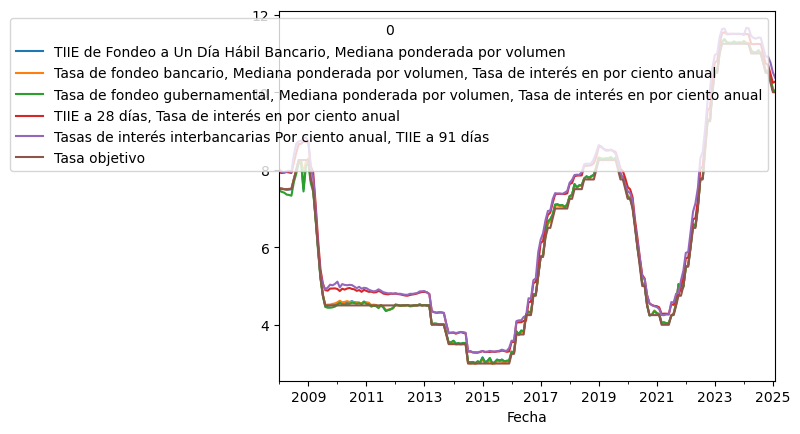

In [500]:
df11.plot()

### DF12

In [501]:
df12.head()

,Título,"Índice Nacional de Precios al consumidor, Variación mensual","Índice Nacional de Precios al consumidor, Variación acumulada","Índice Nacional de Precios al consumidor, variación anual","Inflación, Subyacente (nueva definición), Mensual","Inflación, Subyacente (nueva definición), Acumulada en el año","Inflación, Subyacente (nueva definición), Anual","Inflación, No subyacente (nueva definición), Mensual","Inflación, No subyacente (nueva definición), Acumulada en el año","Inflación, No subyacente (nueva definición), Anual"
0,1969-01-01 00:00:00,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E
1,1969-02-01 00:00:00,0.36,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E
2,1969-03-01 00:00:00,0.1,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E
3,1969-04-01 00:00:00,0.27,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E
4,1969-05-01 00:00:00,0,N/E,N/E,N/E,N/E,N/E,N/E,N/E,N/E


In [502]:
df12 = clean_df(df12)

df12.head()

,"Índice Nacional de Precios al consumidor, Variación mensual","Índice Nacional de Precios al consumidor, Variación acumulada","Índice Nacional de Precios al consumidor, variación anual","Inflación, Subyacente (nueva definición), Mensual","Inflación, Subyacente (nueva definición), Acumulada en el año","Inflación, Subyacente (nueva definición), Anual","Inflación, No subyacente (nueva definición), Mensual","Inflación, No subyacente (nueva definición), Acumulada en el año","Inflación, No subyacente (nueva definición), Anual"
Fecha,,,,,,,,,
1969-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1969-02,0.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1969-03,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1969-04,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1969-05,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Fecha'>

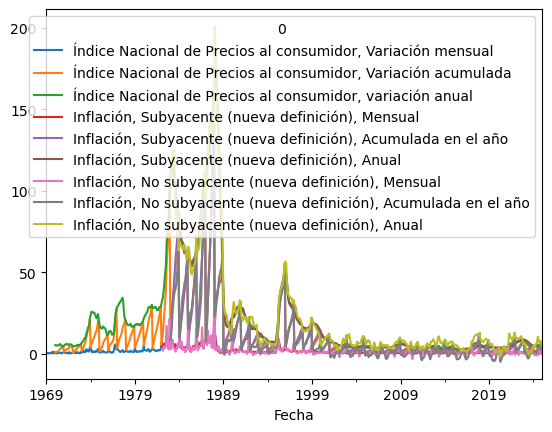

In [503]:
df12.plot()

## ya me canse

In [505]:
for df in [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]:
    # nos quedamos con 2010 en adelante
    df = df.loc["2010":]

In [506]:
df1.head()

,"TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen","TIIE a 28 días, Tasa de interés en por ciento anual","Tasas de interés interbancarias Por ciento anual, TIIE a 91 días",TIIE a 182 días,"Tasas de interés interbancarias Por ciento anual, TIIP a 28 días"
Fecha,,,,,
2006-01,8.27,8.57,N/E,N/E,N/E
2006-01,8.28,8.565,N/E,N/E,N/E
2006-01,8.28,8.55,N/E,N/E,N/E
2006-01,8.28,8.565,8.28,N/E,N/E
2006-01,8.28,8.575,N/E,N/E,N/E
